# Lasso Regression

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
X_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)


In [14]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Initialize Linear Regression model
model = Lasso(alpha=0.1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("r2 score:", r2_score(y_test, predictions))

sfs_backward = SFS(model, 
                   k_features=10, 
                   forward=False, 
                   floating=False, 
                   scoring='neg_mean_squared_error',
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)

# Selected Features
selected_features_backward = X_train.columns[list(sfs_backward.k_feature_idx_)]
print('Selected features in Backward Selection:', selected_features_backward)
print('Score',sfs_backward.k_score_)

pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T

Mean Absolute Error: 8.849299940413069
Mean Squared Error: 123.02942554756467
r2 score: 0.5795879801800927
Selected features in Backward Selection: Index(['PM2.5', 'Land_EQI', 'Sociod_EQI', 'PM10', 'CO', 'CN', 'Water_EQI',
       'EQI', 'smoking_data', 'LCI_smoking'],
      dtype='object')
Score -135.9016548236139


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-143.56144364687256, -134.25841434371165, -11...",-137.120789,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",16.878307,13.131896,6.565948
18,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...","[-143.6856424812561, -134.43947223500186, -114...",-136.792901,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",16.127524,12.547762,6.273881
17,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15...","[-143.32098317181328, -134.4394721679105, -114...",-136.51295,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",15.712574,12.224916,6.112458
16,"(0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 14, 15, 1...","[-143.05505407219047, -134.33148301847027, -11...",-136.261998,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",15.439135,12.012171,6.006086
15,"(0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14, 15, 16, ...","[-143.00600951865374, -134.33591637603686, -11...",-136.131077,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",15.399128,11.981045,5.990522
14,"(0, 1, 2, 3, 5, 9, 10, 11, 12, 14, 15, 16, 17,...","[-142.8060190038371, -134.1547045508986, -114....",-135.950191,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",15.261334,11.873837,5.936918
13,"(0, 1, 2, 5, 9, 10, 11, 12, 14, 15, 16, 17, 18)","[-142.6165983637125, -134.15470381704037, -114...",-135.911119,"(PM2.5, Land_EQI, Sociod_EQI, PM10, CO, CN, Di...",15.240607,11.85771,5.928855
12,"(0, 1, 2, 5, 9, 10, 11, 12, 14, 15, 16, 17)","[-142.56929853353034, -134.15471392179793, -11...",-135.901658,"(PM2.5, Land_EQI, Sociod_EQI, PM10, CO, CN, Di...",15.233754,11.852378,5.926189
11,"(0, 1, 2, 5, 9, 10, 12, 14, 15, 16, 17)","[-142.5692986962115, -134.15470168992357, -114...",-135.901655,"(PM2.5, Land_EQI, Sociod_EQI, PM10, CO, CN, CS...",15.233756,11.852379,5.92619
10,"(0, 1, 2, 5, 9, 10, 14, 15, 16, 17)","[-142.5692986962115, -134.15470168992354, -114...",-135.901655,"(PM2.5, Land_EQI, Sociod_EQI, PM10, CO, CN, Wa...",15.233756,11.852379,5.92619


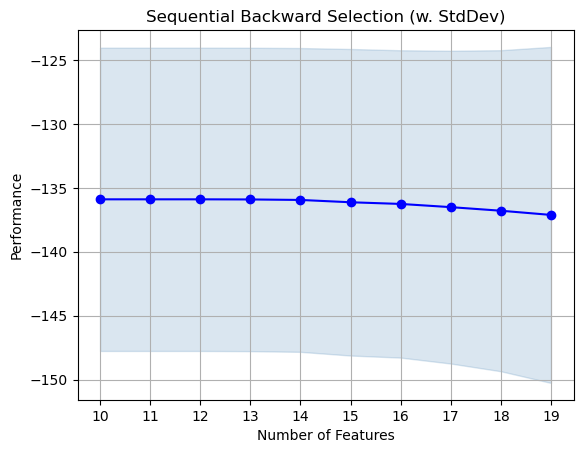

In [15]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig = plot_sfs(sfs_backward.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [16]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

X_train = X_train[selected_features_backward]
X_test = X_test[selected_features_backward]

repeatkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=156)

np.mean(cross_val_score(model, X_train, y_train, cv=repeatkf, n_jobs=-1))



0.5507442970372491

In [17]:
# # insert gridsearch here
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-4, 4, 20)}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# X_test = pd.read_csv('X_test.csv')
# y_test = pd.read_csv('y_test.csv')

# best_model = grid_search.best_estimator_
# test_score = best_model.score(X_test, y_test)
# print("Test set score of the best model:", test_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'alpha': 0.03359818286283781}
Best score: -135.8554546440579


In [18]:


predictions = grid_search.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("r2 score:", r2_score(y_test, predictions))

Mean Absolute Error: 8.841014055672982
Mean Squared Error: 122.84214320906545
r2 score: 0.5802279550954808
